In [41]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_path = '../../data/whisper-small-runs.csv'
df = pd.read_csv(df_path)
df.head()

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda
0,0,eval/fl_en-en_cer,0.073465,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN
1,2048,eval/fl_en-en_cer,0.138486,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN
2,4096,eval/fl_en-en_cer,0.108835,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN
3,6144,eval/fl_en-en_cer,0.133675,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN
4,8192,eval/fl_en-en_cer,0.122401,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN


In [21]:
df['experiment_name'].unique()

array(['whisper-small-tira-croatian',
       'whisper-small-tira-croatian-ewc-lambda-0.01',
       'whisper-small-tira-croatian-ewc-lambda-0.1',
       'whisper-small-tira-croatian-ewc-lambda-1',
       'whisper-small-tira-croatian-lid-alpha-0.2',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-0.01',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-0.01-fp32',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-0.1',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-0.1-fp32',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-1',
       'whisper-small-tira-croatian-lid-alpha-0.2-ewc-lambda-1-fp32',
       'whisper-small-tira-croatian-lid-alpha-0.4',
       'whisper-small-tira-croatian-lid-alpha-0.4-ewc-lambda-0.01',
       'whisper-small-tira-croatian-lid-alpha-0.4-ewc-lambda-0.1',
       'whisper-small-tira-croatian-lid-alpha-0.4-ewc-lambda-1',
       'whisper-small-tira-croatian-lid-alpha-0.6',
       'whisper-small-tira-croati

In [22]:
# get more detailed colnames
get_metric = lambda s: 'cer' if s.endswith('cer') else 'wer' if s.endswith('wer') else ''
df['metric']=df['tag'].apply(get_metric)
df['metric'].value_counts()

metric
       15827
cer     2713
wer     2713
Name: count, dtype: int64

In [23]:
df

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,metric
0,0,eval/fl_en-en_cer,7.346534e-02,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer
1,2048,eval/fl_en-en_cer,1.384857e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer
2,4096,eval/fl_en-en_cer,1.088353e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer
3,6144,eval/fl_en-en_cer,1.336747e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer
4,8192,eval/fl_en-en_cer,1.224009e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21248,5460,train/total_flos,1.258810e+19,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,
21249,5460,train/train_loss,6.683950e-02,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,
21250,5460,train/train_runtime,3.858511e+03,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,
21251,5460,train/train_samples_per_second,1.130500e+01,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,


In [24]:
df['epoch']=0
epoch_mask = df['tag'].str.contains('epoch')
for i, row in df[epoch_mask].iterrows():
    step_mask = df['step']==row['step']
    exp_mask = df['experiment_name']==row['experiment_name']
    df.loc[step_mask & exp_mask, 'epoch'] = int(row['value'])
df

,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,ewc_lambda,metric,epoch
0,0,eval/fl_en-en_cer,7.346534e-02,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer,0
1,2048,eval/fl_en-en_cer,1.384857e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer,1
2,4096,eval/fl_en-en_cer,1.088353e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer,2
3,6144,eval/fl_en-en_cer,1.336747e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer,3
4,8192,eval/fl_en-en_cer,1.224009e-01,whisper-small-tira-croatian,1900-01-23 14:26:44,NaN,False,croatian,False,NaN,NaN,NaN,cer,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21248,5460,train/total_flos,1.258810e+19,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,,10
21249,5460,train/train_loss,6.683950e-02,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,,10
21250,5460,train/train_runtime,3.858511e+03,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,,10
21251,5460,train/train_samples_per_second,1.130500e+01,whisper-small-zulu-swahili-lid-alpha-0.8-ewc-l...,1900-01-25 01:17:10,0.8,False,swahili,False,NaN,NaN,1.0,,10


In [25]:
unique_datasets = ['fl_en', 'HH20210312', 'HH20210913', 'tira-clean-split', 'sasoc-cs', 'sasoc-zul', 'sasoc-en', 'nchlt_zul', 'nchlt_eng']

def get_dataset(s):
    for dataset in unique_datasets:
        if dataset in s:
            return dataset


df['dataset']=df['tag'].apply(get_dataset)
df['dataset'].value_counts()

dataset
fl_en               6840
sasoc-cs            5448
nchlt_zul           2610
tira-clean-split    1380
Name: count, dtype: int64

In [26]:
# so we can compare no LID loss to using LID loss
df['lid_loss_alpha']=df['lid_loss_alpha'].fillna(0)
df['ewc_lambda']=df['ewc_lambda'].fillna(0)

In [27]:
df['ewc']=df['ewc_lambda']>0
df['lid_loss']=df['lid_loss_alpha']>0
df['regularization']='none'
df.loc[df['ewc'], 'regularization']='ewc'
df.loc[df['lid_loss'], 'regularization']='lid_loss'
df.loc[df['ewc'] & df['lid_loss'], 'regularization']='ewc+lid_loss'

In [28]:
df['train_data']='tira'
df.loc[df['experiment_name'].str.contains('zulu'), 'train_data']='zulu'
df.loc[df['experiment_name'].str.contains('zulu-swahili-eng'), 'train_data']='zulu+eng'
df.loc[df['experiment_name'].str.contains('zulu-eng-cs'), 'train_data']='zulu-eng-cs'

In [49]:
df=df.sort_values('step')
for experiment in df['experiment_name'].unique():
    for tag in df['tag'].unique():
        if 'loss' not in tag:
            continue
        loss_mask = df['tag']==tag
        experiment_mask = df['experiment_name']==experiment
        loss_diff = np.diff(df.loc[experiment_mask&loss_mask, 'value'])
        loss_diff = np.insert(loss_diff, 0, 0)
        df.loc[experiment_mask&loss_mask, 'loss_diff']=loss_diff
df.head()


,step,tag,value,experiment_name,date,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,...,ewc_lambda,metric,epoch,dataset,ewc,lid_loss,regularization,train_data,train/loss_diff,loss_diff
0,0,eval/fl_en-en_cer,0.073465,whisper-small-tira-croatian,1900-01-23 14:26:44,0.0,False,croatian,False,NaN,...,0.0,cer,0,fl_en,False,False,none,tira,NaN,NaN
4299,0,eval/fl_en-en_samples_per_second,8.718000,whisper-small-tira-croatian-lid-alpha-0.8-ewc-...,1900-01-23 04:41:54,0.8,False,croatian,False,NaN,...,0.1,,0,fl_en,True,True,ewc+lid_loss,tira,NaN,NaN
15147,0,eval/sasoc-cs-en+sw_samples_per_second,8.286000,whisper-small-zulu-swahili-lid-alpha-0.2,1900-01-27 10:23:24,0.2,False,swahili,False,NaN,...,0.0,,0,sasoc-cs,False,True,lid_loss,zulu,NaN,NaN
2052,0,eval/tira-clean-split-croatian_cer,0.763227,whisper-small-tira-croatian-lid-alpha-0.4,1900-01-28 13:01:50,0.4,False,croatian,False,NaN,...,0.0,cer,0,tira-clean-split,False,True,lid_loss,tira,NaN,NaN
9771,0,eval/fl_en-en_wer,0.273285,whisper-small-zulu-swahili-eng-ewc-lambda-1,1900-02-03 08:35:46,0.0,False,swahili,False,NaN,...,1.0,wer,0,fl_en,True,False,ewc,zulu+eng,NaN,NaN


# EWC

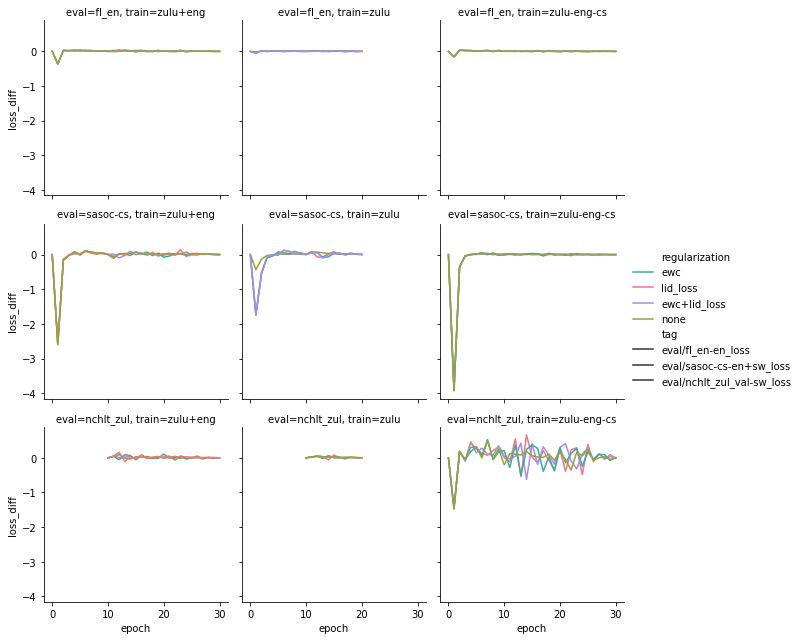

In [56]:
g = sb.FacetGrid(
    df[
        # (df['experiment_name'].str.contains('zulu')) &
        # ~(df['experiment_name'].str.contains('zulu-swahili-eng')) &
        ~(df['experiment_name'].str.contains('tira')) &
        # (df['lang_prompt']=='swahili') &
        # (df['lang_prompt']=='croatian')&
        # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs', 'nchlt_zul'])) &
        # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs'])) &
        (df['ewc_lambda'].isin([0,1])) &
        (df['lid_loss_alpha'].isin([0,0.2])) &
        # (df['regularization']=='none')&
        (df['tag'].str.contains('loss'))
        # (df['tag']=='train/loss')
        # (df['metric']!='')
        # (df['LoRA'])
    ],
    # col='ewc_lambda',
    col='train_data',
    # col='lid_loss_alpha',
    row='dataset',
    # sharey=False,
)
palette_map= {
    key: color for key, color in
    zip(['lid_loss', 'none', 'ewc', 'ewc+lid_loss'], sb.color_palette('husl',4))
}
g.map_dataframe(
    sb.lineplot,
    x='epoch',
    y='loss_diff',
    # hue='lid_loss_alpha',
    hue='regularization',
    palette=palette_map,
    # hue='ewc_lambda',
    errorbar=None,
    legend='full',
    # style='metric',
    style='tag',
)
g.set_titles('eval={row_name}, train={col_name}')
# g.set_titles('train={col_name}')
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
# g.set(ylim=(0,1))
plt.show()

In [18]:
df.loc[
    ~(df['experiment_name'].str.contains('tira')) &
    # (df['dataset'].isin(['fl_en', 'tira-clean-split', 'sasoc-cs', 'nchlt_zul'])) &
    (df['dataset']=='sasoc-cs') &
    (df['ewc_lambda'].isin([1])) &
    (df['lid_loss_alpha'].isin([0.2])) &
    # (df['regularization']=='none')&
    # (df['epoch']>20)&
    # (df['epoch']>25)&
    (df['metric']=='wer'),
    ['epoch', 'step', 'value', 'experiment_name', 'lang_prompt', 'tag']
].sort_values('value')

,epoch,step,value,experiment_name,lang_prompt,tag
7167,19,6650,0.471903,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
7176,28,9800,0.473819,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
7160,12,4200,0.474457,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
7175,27,9450,0.475734,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
7177,29,10150,0.475734,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
...,...,...,...,...,...,...
11493,0,0,1.492337,whisper-small-zulu-swahili-eng-lid-alpha-0.2-e...,swahili,eval/sasoc-cs-en+sw_wer
16375,0,0,1.492337,whisper-small-zulu-swahili-lid-alpha-0.2-ewc-l...,swahili,eval/sasoc-cs-en+sw_wer
7148,0,0,1.492337,whisper-small-zulu-eng-cs-lid-alpha-0.2-ewc-la...,-1,eval/sasoc-cs-en+sw_wer
11494,1,699,1.536398,whisper-small-zulu-swahili-eng-lid-alpha-0.2-e...,swahili,eval/sasoc-cs-en+sw_wer


# Langtok selection + LID loss

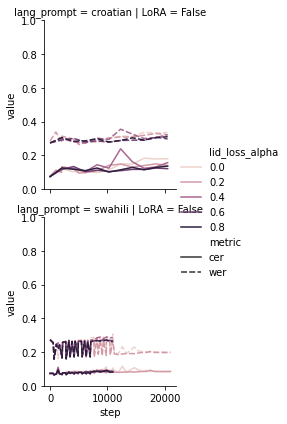

In [14]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='fl_en') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
plt.show()

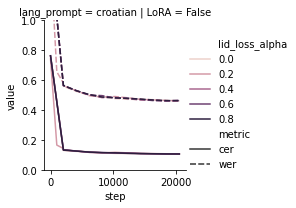

In [15]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='tira-clean-split') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
# g.set_title('Performance on English while decoding as Yoruba')
g.set(ylim=(0,1))
plt.show()

In [16]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='HH20210312') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
g.set(ylim=(0,1))
g.figure.suptitle('Performance on HH20210312 (in-domain)', size=16)
g.figure.subplots_adjust(top=.9)
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

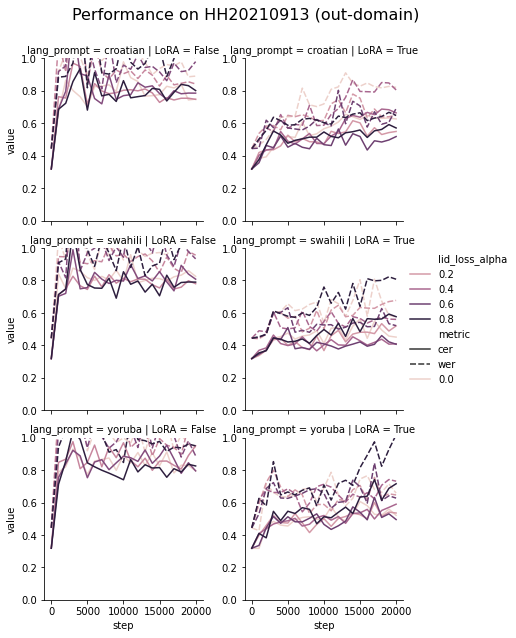

In [ ]:
g = sb.FacetGrid(
    df[
        (df['dataset']=='HH20210913') &
        (df['metric']!='') &
        (df['lang_prompt'].isin(['yoruba', 'swahili', 'croatian']))
    ],
    col='LoRA',
    row='lang_prompt',
    # hue='lid_loss_alpha',
    sharey=False,
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    legend='full',
    style='metric',
)
g.add_legend()
g.set(ylim=(0,1))
g.figure.suptitle('Performance on HH20210913 (out-domain)', size=16)
g.figure.subplots_adjust(top=.9)
plt.show()

In [ ]:
df.loc[(df['tag']=='train/train_runtime')&df['LoRA'], 'value'].mean(), df.loc[(df['tag']=='train/train_runtime')&~df['LoRA'], 'value'].mean()

(42977.192708333336, 46647.522705078125)

# Langtoken experiments

In [ ]:
df.loc[~df['embedding_distance_regularization_type'].isna(), 'dataset'].value_counts()


Series([], Name: count, dtype: int64)

In [ ]:
g=sb.FacetGrid(
    df[
        (df['dataset'].isin(['tira-clean-split', 'fl_en'])) &
        (df['embedding_distance_regularization_type']!='') &
        (df['metric']!='')
    ],
    col='embedding_distance_regularization_type',
    row='dataset'
)
g.map_dataframe(
    sb.lineplot,
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='metric',
)
g.map(plt.axhline, y=1, color='red', linestyle='--')
g.set_titles('{col_name} {row_name}')
g.add_legend()
g.figure.suptitle('Performance on Tira while finetuning language prompt')
g.figure.subplots_adjust(top=.8)

ValueError: Number of columns must be a positive integer, not 0

<Figure size 0x432 with 0 Axes>

Text(0.5, 1.0, 'Performance on Tira while finetuning language prompt')

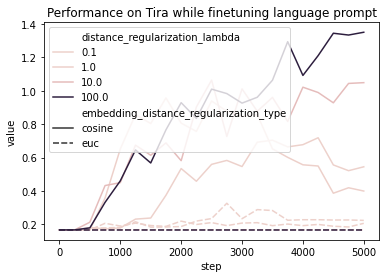

In [ ]:
ax=sb.lineplot(
    df[
        (df['dataset']=='fl_en') &
        (df['embedding_distance_regularization_type']!='') &
        (df['metric']!='')
    ],
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='embedding_distance_regularization_type',
)
# ax.set(ylim=(0, 6))
ax.set_title('Performance on Tira while finetuning language prompt')